# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Vypracování

## Zpracování dat

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import torch
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 437.9 MB


In [5]:
print(f'Number of NaN is {data.isna().sum().sum()}')
data.describe()

Number of NaN is 0


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.00000,56000.000000,56000.000000,56000.000000
mean,0.873482,0.873482,0.873482,0.873482,0.873500,0.873500,0.873536,0.873679,0.877179,0.883036,...,0.899732,0.897536,0.888554,0.878393,0.874071,0.873589,0.87350,0.873482,0.873482,4.494393
std,1.493611,1.493611,1.493611,1.493611,1.493642,1.493642,1.493681,1.493741,1.557755,1.763484,...,2.041735,2.039311,1.995824,1.587205,1.494407,1.493691,1.49369,1.493611,1.493611,2.872563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,80.000000,168.000000,...,141.000000,168.000000,210.000000,107.000000,11.000000,11.000000,11.00000,11.000000,11.000000,9.000000


Jak jsme předpokládali, tak žádné chybějící hodnoty v datasetu nemáme.

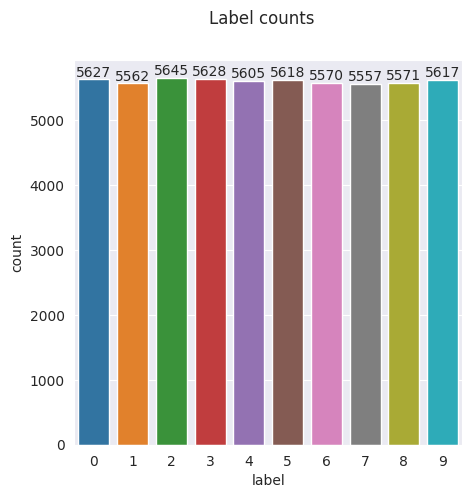

In [ ]:
sns.set_style("darkgrid")
palette = sns.color_palette("hls", 10)
 
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Label counts')

sns.countplot(x='label', data=data, ax = ax)
ax.bar_label(ax.containers[0])
plt.show()

Vidíme, že labely jednotlivých obrázků jsou rovnoměrně rozložené.

Připravíme si předem trénovací, validační a testovací množinu.

In [6]:
from sklearn.model_selection import train_test_split
random_seed = 7

Xtrain, Xrest, ytrain, yrest = train_test_split(
    data.drop(columns=['label']), data['label'], test_size=0.4, random_state=random_seed)
Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.5, random_state=random_seed)
Xtrain = Xtrain.to_numpy()
ytrain = ytrain.to_numpy()
Xval = Xval.to_numpy()
yval = yval.to_numpy()
Xtest = Xtest.to_numpy()
ytest = ytest.to_numpy()

Xtrain_norm = Xtrain/255
Xval_norm = Xval/255
Xtest_norm = Xtest/255

mean = np.mean(Xtrain)
std = np.std(Xtrain)
Xtrain_std = (Xtrain-mean)/std
Xval_std = (Xval-mean)/std
Xtest_std = (Xtest-mean)/std



Podle zdroje by jednotlivé labely měly odpovídat takto
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

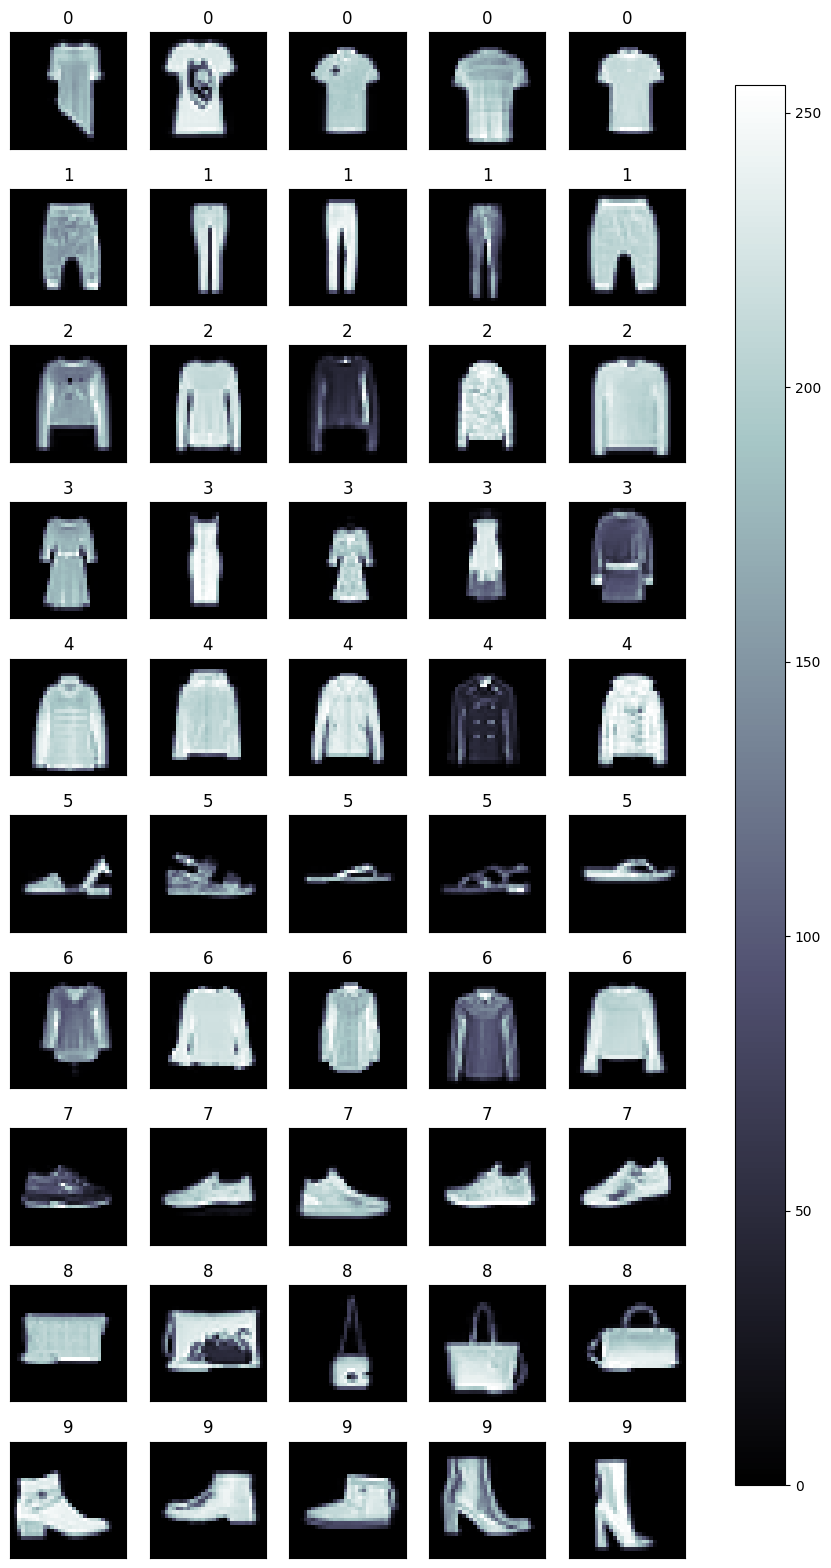

In [7]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10,20))
for i in range(10):
    images = Xtrain[(np.where(ytrain==i))[0][:5]]
    for j in range(5):
        ax = axes.flat[i*5 + j]
        im = ax.imshow(images[j].reshape(32,32), cmap='bone')
        ax.set_title(i)
        ax.set_xticks([])
        ax.set_yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

Laickým pohledem můžeme usoudit, že labely vskutku sedí podle zdroje.

Jelikož využíváme knihovnu Pytorch, převedeme obrázky na Pytorch tensory.

In [8]:
import torch.utils.data as td
train_dataset = td.TensorDataset(torch.tensor(Xtrain, dtype=torch.float), torch.tensor(ytrain))
val_dataset = td.TensorDataset(torch.tensor(Xval, dtype=torch.float), torch.tensor(yval))

train_norm_dataset = td.TensorDataset(torch.tensor(Xtrain_norm, dtype=torch.float), torch.tensor(ytrain))
val_norm_dataset = td.TensorDataset(torch.tensor(Xval_norm, dtype=torch.float), torch.tensor(yval))

Připravíme si též DataLoadery, které nám budou dodávat jednotlivé dávky.

In [21]:
train_loader = td.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = td.DataLoader(val_dataset, batch_size=128, shuffle=False)

train_norm_loader = td.DataLoader(train_norm_dataset, batch_size=64, shuffle=True)
val_norm_loader = td.DataLoader(val_norm_dataset, batch_size=128, shuffle=False)


## Dopředná neuronová síť 

Sestavíme si jednoduchou neuronovou síť a proměnlivou hloubkou a počtem neuronů ve skrytých vrstvách. Každá skrytá vrstva bude mít 2x méně neuronů, než vrstva předchozí.
Domníváme se, že by se mohlo jednat o poměrně dobrý model, neboť neuronové sítě jsou poměrně dobré v učení se různých patternů.

In [9]:
import torch.nn as nn

class MyNN(nn.Module):
    def __init__(self, hidden_size, num_hidden_layers):
        super().__init__()
        
        self.input_layer = nn.Linear(1024, hidden_size)
        
        self.hidden_layers = nn.ModuleList()
        for i in range(num_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size//2))
            hidden_size //=2
        
        self.output_layer = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = self.input_layer(x)
        x = nn.functional.relu(x)
        for layer in self.hidden_layers:
            x = nn.functional.relu(layer(x))

        x = self.output_layer(x)
        return x

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Napíšeme si jednotlivé funkce, které natrénují model a následně vypočtou validační přesnost.

In [11]:
def train_one_epoch(model, device, loss_fn, optimizer, training_loader):
    model.train()
    cum_loss = 0.
    for inputs, labels in training_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        last_mean_loss = loss.item()
        cum_loss += last_mean_loss * inputs.shape[0]

    return cum_loss / len(train_dataset)

def validate(model, device, loss_fn, validation_loader):
    model.eval()
    cum_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            cum_loss += loss_fn(outputs, labels).item() * inputs.shape[0]
            pred = outputs.argmax(dim=1, keepdim=True) 
            correct += pred.eq(labels.view_as(pred)).sum().item()
    avg_loss = cum_loss/len(validation_loader.dataset)
    accuracy = correct/len(validation_loader.dataset)
    return avg_loss, accuracy

Napíšeme si navíc funkci, která natrénuju model a spočítá validační přesnost pro náš daný počet epoch. Zároveň si budeme ukládat dosud nejlepší model. K Ušetření času využijeme tzv. Early stopping.

In [12]:
EPOCHS = 40
PATIENCE = 10

def train_model(model, device, loss_fn, optimizer, training_loader, validation_loader, printing=False):
    min_vloss = None
    best_accuracy = 0 # associated with min min_vloss
    counter = 0
    for epoch in range(EPOCHS):
        # One training step
        train_loss = train_one_epoch(model, device, loss_fn, optimizer, training_loader)

        avg_vloss, vacc = validate(model, device, loss_fn, validation_loader)
        if printing: print(f"TRAIN loss: {train_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        if min_vloss is None or avg_vloss < min_vloss:
            min_vloss = avg_vloss
            best_accuracy = vacc
            model_path = f'checkpoints/best_model.pt'
            torch.save(model.state_dict(), model_path)
            counter = 0
        elif avg_vloss > min_vloss:
            counter += 1
            if counter >= PATIENCE:
                break
    return min_vloss, best_accuracy

Nyní model zkusíme natrénovat a vyladit hloubku a počet neuronů v první skryté vrstvě. 

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
        'hidden_size': [128, 256, 512],
        'num_hidden_layers': [1, 2, 3],
}

def tune_myNN(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in ParameterGrid(param_grid):
        model = MyNN(**params)
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())

        vloss, accuracy = train_model(model, device, loss_fn, optimizer, training_loader, validation_loader)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_model.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses

best_model, accuracies, losses = tune_myNN(train_loader, val_loader, device, param_grid)

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 1}
VALIDATION loss: 0.495, accuraccy: 0.826

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 2}
VALIDATION loss: 0.465, accuraccy: 0.844

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 3}
VALIDATION loss: 0.454, accuraccy: 0.836

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 1}
VALIDATION loss: 0.471, accuraccy: 0.839

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 2}
VALIDATION loss: 0.458, accuraccy: 0.847

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 3}
VALIDATION loss: 0.460, accuraccy: 0.837

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 1}
VALIDATION loss: 0.491, accuraccy: 0.829

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 2}
VALIDATION loss: 0.454, accuraccy: 0.843

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 3}
VALIDATION loss:

Můžeme si hezky vizualizovat jednotlivé validační ztrátové funkce a přesnosti.

Text(0.5, 1.0, 'Accuracy')

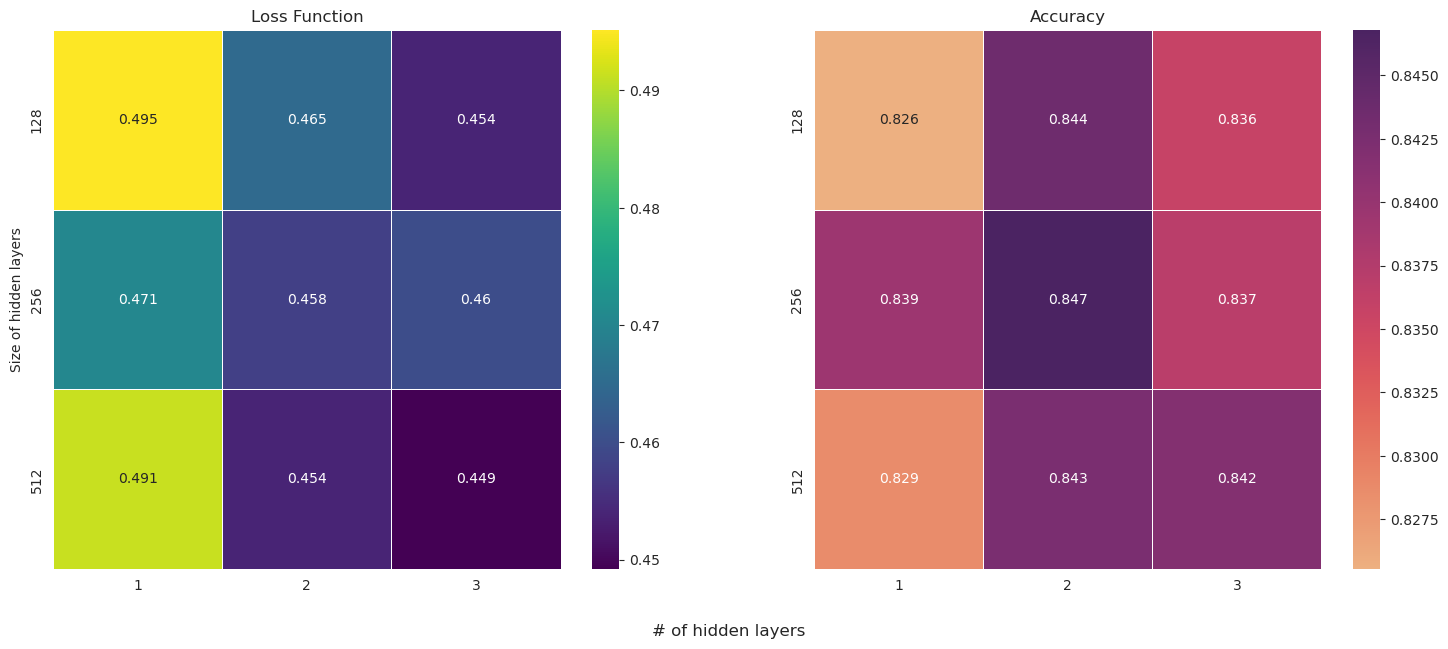

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
losses = np.array(losses).reshape(3,3)
sns.heatmap(losses, linewidth=0.5, cmap='viridis', annot=True, fmt='.3g', xticklabels=param_grid['num_hidden_layers'], yticklabels=param_grid['hidden_size'], ax=ax1)

accuracies = np.array(accuracies).reshape(3,3)
sns.heatmap(accuracies, linewidth=0.5, cmap='flare', annot=True, fmt='.3g',  xticklabels=param_grid['num_hidden_layers'], yticklabels=param_grid['hidden_size'], ax=ax2)
fig.supxlabel('# of hidden layers')
ax1.set_ylabel('Size of hidden layers')

ax1.set_title('Loss Function')
ax2.set_title('Accuracy')

Vidíme, že model s nejvíce vrstvami a nejvíce neurony dopadl nejlépe, co se hodnoty ztrátové funkce týče.

Zkusíme nyní to samé s normalizovanými daty.

In [ ]:
best_model_norm, accuracies, losses = tune_myNN(train_norm_loader, val_norm_loader, device, param_grid)

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 1}
VALIDATION loss: 0.433, accuraccy: 0.847

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 2}
VALIDATION loss: 0.437, accuraccy: 0.845

Fitting models with params {'hidden_size': 128, 'num_hidden_layers': 3}
VALIDATION loss: 0.451, accuraccy: 0.843

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 1}
VALIDATION loss: 0.417, accuraccy: 0.852

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 2}
VALIDATION loss: 0.429, accuraccy: 0.852

Fitting models with params {'hidden_size': 256, 'num_hidden_layers': 3}
VALIDATION loss: 0.439, accuraccy: 0.847

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 1}
VALIDATION loss: 0.423, accuraccy: 0.853

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 2}
VALIDATION loss: 0.419, accuraccy: 0.852

Fitting models with params {'hidden_size': 512, 'num_hidden_layers': 3}
VALIDATION loss:

Text(0.5, 1.0, 'Accuracy')

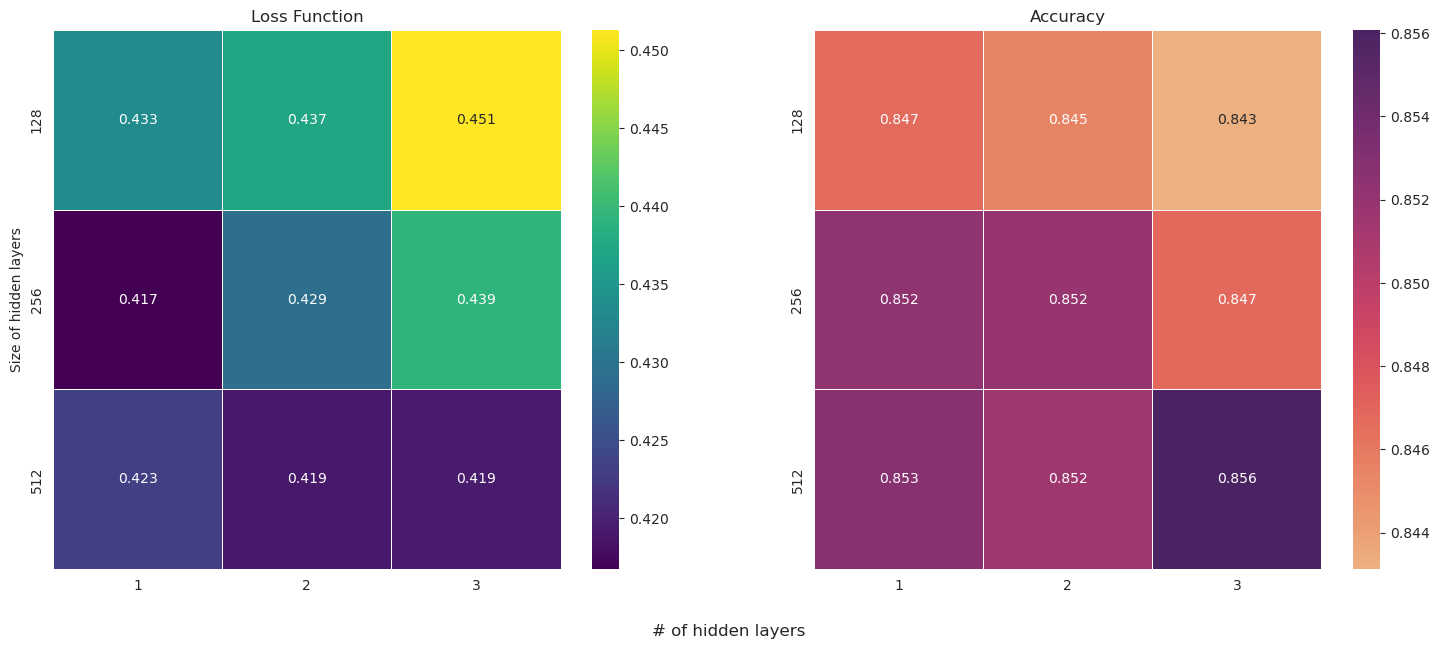

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
losses = np.array(losses).reshape(3,3)
sns.heatmap(losses, linewidth=0.5, cmap = 'viridis', annot=True, fmt='.3g',  xticklabels=param_grid['num_hidden_layers'], yticklabels=param_grid['hidden_size'], ax = ax1)

accuracies = np.array(accuracies).reshape(3,3)
sns.heatmap(accuracies, linewidth=0.5, cmap='flare',  annot=True, fmt='.3g', xticklabels=param_grid['num_hidden_layers'], yticklabels=param_grid['hidden_size'], ax=ax2)
fig.supxlabel('# of hidden layers')
ax1.set_ylabel('Size of hidden layers')

ax1.set_title('Loss Function')
ax2.set_title('Accuracy')

Vidíme, že trénování s normalizovanými daty dopadla obecně lépe, tedy ji budeme používat i nadále pouze ty. K ušetření času nebudeme nyní uvažovat standardizovaná data.

Zkusíme experimentovat ještě s různými tipy optimizerů, zda se nějaký nebude hodit na naši úlohu znatelně více než jiné. Zkusíme obyčejný SGD, RMSprop, Adagrad a porovnáme to s Adam, který jsme dosud používali. Zároveň zkusíme i různé learning rates.

In [ ]:
from itertools import product
param_grid = {
        'optimizer': [torch.optim.SGD, torch.optim.RMSprop, torch.optim.Adagrad, torch.optim.Adam ],
        'lr': [0.0001, 0.001, 0.01]
}

def tune_myNN_optim(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in product(*param_grid.values()):
        model = MyNN(512, 3)
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer_class, lr = params
        optimizer = optimizer_class(model.parameters(), lr=lr)

        vloss, accuracy = train_model(model, device, loss_fn, optimizer, training_loader, validation_loader)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_model.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses

In [ ]:
best_model_norm_opt, accuracies, losses = tune_myNN_optim(train_norm_loader, val_norm_loader, device, param_grid)

Fitting models with params (<class 'torch.optim.sgd.SGD'>, 0.0001)
VALIDATION loss: 2.299, accuraccy: 0.101

Fitting models with params (<class 'torch.optim.sgd.SGD'>, 0.001)
VALIDATION loss: 1.132, accuraccy: 0.548

Fitting models with params (<class 'torch.optim.sgd.SGD'>, 0.01)
VALIDATION loss: 0.481, accuraccy: 0.829

Fitting models with params (<class 'torch.optim.rmsprop.RMSprop'>, 0.0001)
VALIDATION loss: 0.421, accuraccy: 0.854

Fitting models with params (<class 'torch.optim.rmsprop.RMSprop'>, 0.001)
VALIDATION loss: 0.434, accuraccy: 0.852

Fitting models with params (<class 'torch.optim.rmsprop.RMSprop'>, 0.01)
VALIDATION loss: 0.540, accuraccy: 0.812

Fitting models with params (<class 'torch.optim.adagrad.Adagrad'>, 0.0001)
VALIDATION loss: 0.962, accuraccy: 0.638

Fitting models with params (<class 'torch.optim.adagrad.Adagrad'>, 0.001)
VALIDATION loss: 0.566, accuraccy: 0.791

Fitting models with params (<class 'torch.optim.adagrad.Adagrad'>, 0.01)
VALIDATION loss: 0.413

Text(0.5, 1.0, 'Accuracy')

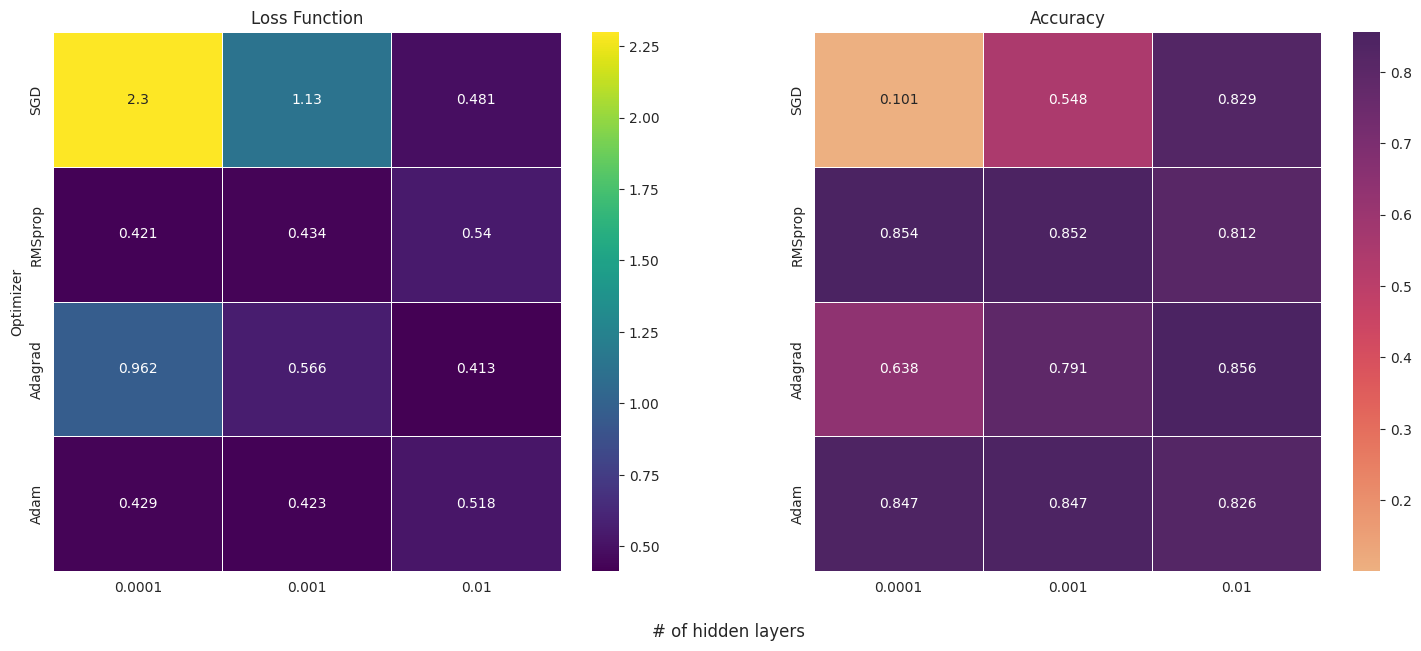

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
losses = np.array(losses).reshape(4,3)
sns.heatmap(losses, linewidth=0.5, cmap = 'viridis', annot=True, fmt='.3g', xticklabels=param_grid['lr'], yticklabels=['SGD', 'RMSprop', 'Adagrad', 'Adam'], ax=ax1)

accuracies = np.array(accuracies).reshape(4,3)
sns.heatmap(accuracies, linewidth=0.5, cmap='flare',  annot=True, fmt='.3g', xticklabels=param_grid['lr'], yticklabels=['SGD', 'RMSprop', 'Adagrad', 'Adam'], ax=ax2)
fig.supxlabel('# of hidden layers')
ax1.set_ylabel('Optimizer')

ax1.set_title('Loss Function')
ax2.set_title('Accuracy')

Vidíme, že RMSProp dopadl nejlépe, nicméně výsledky jsou od Adam velmi malé a tedy i nadále budeme používat jej, neboť je mezi nimi obecně nejpoužívanější. 
Zajímavé je, že SGD mělo s lr 0.0001 nejspíš numerický problém a zasekl se nejspíše v nějakém bodě lokálního extrému.

### Regularizace

Zkusíme nakonec různé regularizace. Zaměříme se pouze na využití batch normalizace a dropoutu a zároveň s nimi zkusíme najít vhodnou hloubku a počet neuronů.

In [ ]:
class MyRegulatedNN(nn.Module):
    def __init__(self, hidden_size, num_hidden_layers, dropout_rate, use_batch_norm):
        super().__init__()
        
        self.input_layer = nn.Linear(1024, hidden_size)
        self.use_batch_norm = use_batch_norm
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout1d(dropout_rate)
        self.hidden_layers = nn.ModuleList()
        self.hidden_batch_norms = nn.ModuleList()
        for i in range(num_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size//2))
            hidden_size //=2
            self.hidden_batch_norms.append(nn.BatchNorm1d(hidden_size))
        
        self.output_layer = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = self.input_layer(x)
        if self.use_batch_norm: 
            x = self.batch_norm(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        for i, layer in enumerate(self.hidden_layers):
            x = layer(x)
            if self.use_batch_norm: 
                x = self.hidden_batch_norms[i](x)
            x = nn.functional.relu(x)
            x = self.dropout(x)

        x = self.output_layer(x)
        return x


Přidáme tedy navíc vyzkoušení 2 různých dropout rates a využití batch normalizace v každé vrstvě.

In [ ]:
param_grid_all = {
    'hidden_size': [256, 512],
    'num_hidden_layers': [2, 3],
    'dropout_rate': [0.1, 0.2],
    'use_batch_norm': [False, True]
}

def tune_MyRegulatedNN(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in ParameterGrid(param_grid):
        model = MyRegulatedNN(**params)
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())

        vloss, accuracy = train_model(model, device, loss_fn, optimizer, training_loader, validation_loader, False)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_model.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses

In [ ]:
best_model_regul, accuracies_regul, losses_regul = tune_MyRegulatedNN(train_norm_loader, val_norm_loader, device, param_grid_all)


Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 256, 'num_hidden_layers': 2, 'use_batch_norm': False}
VALIDATION loss: 0.412, accuraccy: 0.855

Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 256, 'num_hidden_layers': 2, 'use_batch_norm': True}
VALIDATION loss: 0.398, accuraccy: 0.858

Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 256, 'num_hidden_layers': 3, 'use_batch_norm': False}
VALIDATION loss: 0.421, accuraccy: 0.852

Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 256, 'num_hidden_layers': 3, 'use_batch_norm': True}
VALIDATION loss: 0.403, accuraccy: 0.853

Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 512, 'num_hidden_layers': 2, 'use_batch_norm': False}
VALIDATION loss: 0.419, accuraccy: 0.853

Fitting models with params {'dropout_rate': 0.1, 'hidden_size': 512, 'num_hidden_layers': 2, 'use_batch_norm': True}
VALIDATION loss: 0.405, accuraccy: 0.851

Fitting models with params {'dropout_rate':

In [ ]:
print(f'Best model is with params {ParameterGrid(param_grid_all)[np.argmin(losses_regul)]}')
print(f'VALIDATION loss: {losses_regul[np.argmin(losses_regul)]:.3f}, accuraccy: {accuracies_regul[np.argmin(losses_regul)]:.3f}')

Best model is with params {'use_batch_norm': True, 'num_hidden_layers': 3, 'hidden_size': 512, 'dropout_rate': 0.1}
VALIDATION loss: 0.397, accuraccy: 0.856


Vidíme, že jsme model zvládli o něco vylepšit velkým množstvím hyperparametrů.

## Konvoluční neuronová síť

Bude nejspíše platit, že konvoluční neuronová síť se bude na náš dataset hodit více. Konvoluční neuronové sítě totiž umí lépe zachytit lokální hodnotu pixelu v rámci svého okolí a lépe detekuje různé vzory.

Napíšeme si jednoduchou třídu, která bude mít proměnlivý počet konvolučních vrstev a počet výstupních kanálů v první konvoluční vrstvě. Zároveň následující konvoluční vrstvy budou mít výstupních kanálů více, neboť Maxpooling nás připraví a spoustu parametrů a budeme chtít vyrovnat zmenšení dimenze. 

Zároveň na konci využijeme navíc 3 fully-connected vrstvy.

In [ ]:
class MyCNN(nn.Module):
    def __init__(self, convolution_channel, convolution_layers):
        super().__init__()
        
        self.conv_layers = nn.ModuleList()
        prev_channel = 1
        size = 32
        for _ in range(convolution_layers):
            self.conv_layers.append(nn.Conv2d(in_channels = prev_channel, out_channels = convolution_channel, kernel_size = 3))
            prev_channel = convolution_channel
            convolution_channel *= 2
            size -= 2
            size //= 2

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear1 = nn.Linear(prev_channel * size * size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1,1,32,32)
        for i, layer in enumerate(self.conv_layers):
            x = layer(x)
            x = nn.functional.relu(x)
            x = self.pool(x)
        x = x.flatten(start_dim = 1) 
        x = self.linear1(x)
        x = nn.functional.relu(x)
        x = self.linear2(x)
        x = nn.functional.relu(x)
        x = self.output_layer(x)
        return x


In [14]:
EPOCHS_CNN = 40
PATIENCE_CNN = 10

def train_model_cnn(model, device, loss_fn, optimizer, training_loader, validation_loader, printing=False):
    min_vloss = None
    best_accuracy = 0 # associated with min min_vloss
    counter = 0
    for epoch in range(EPOCHS_CNN):
        # One training step
        train_loss = train_one_epoch(model, device, loss_fn, optimizer, training_loader)

        avg_vloss, vacc = validate(model, device, loss_fn, validation_loader)
        if printing: print(f"TRAIN loss: {train_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        if min_vloss is None or avg_vloss < min_vloss:
            min_vloss = avg_vloss
            best_accuracy = vacc
            model_path = f'checkpoints/best_cnn.pt'
            torch.save(model.state_dict(), model_path)
            counter = 0
        elif avg_vloss > min_vloss:
            counter += 1
            if counter >= PATIENCE_CNN:
                break
    return min_vloss, best_accuracy

Nyní zkusíme dané dva hyperparametry vyladit. V rámci výpočetních možností zvolíme pouze 3 a 3 možnosti pro naše hyperparametry.

In [16]:
from sklearn.model_selection import ParameterGrid

param_grid_cnn = {
        'convolution_channel': [16, 32, 64],
        'convolution_layers': [1, 2, 3],
}

def tune_myCNN(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in ParameterGrid(param_grid):
        model = MyCNN(**params)
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())

        vloss, accuracy = train_model_cnn(model, device, loss_fn, optimizer, training_loader, validation_loader)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_cnn.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses


In [ ]:
best_cnn, accuracies_cnn, losses_cnn = tune_myCNN(train_norm_loader, val_norm_loader, device, param_grid_cnn)

Fitting models with params {'convolution_channel': 16, 'convolution_layers': 1}
VALIDATION loss: 0.339, accuraccy: 0.877

Fitting models with params {'convolution_channel': 16, 'convolution_layers': 2}
VALIDATION loss: 0.336, accuraccy: 0.881

Fitting models with params {'convolution_channel': 16, 'convolution_layers': 3}
VALIDATION loss: 0.326, accuraccy: 0.882

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 1}
VALIDATION loss: 0.341, accuraccy: 0.879

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2}
VALIDATION loss: 0.326, accuraccy: 0.884

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 3}
VALIDATION loss: 0.322, accuraccy: 0.885

Fitting models with params {'convolution_channel': 64, 'convolution_layers': 1}
VALIDATION loss: 0.335, accuraccy: 0.883

Fitting models with params {'convolution_channel': 64, 'convolution_layers': 2}
VALIDATION loss: 0.305, accuraccy: 0.892

Fitting models with para

Opět si můžeme vykreslit graficky hodnotu ztrátové funkce a přesnost.

Text(0.5, 1.0, 'Accuracy')

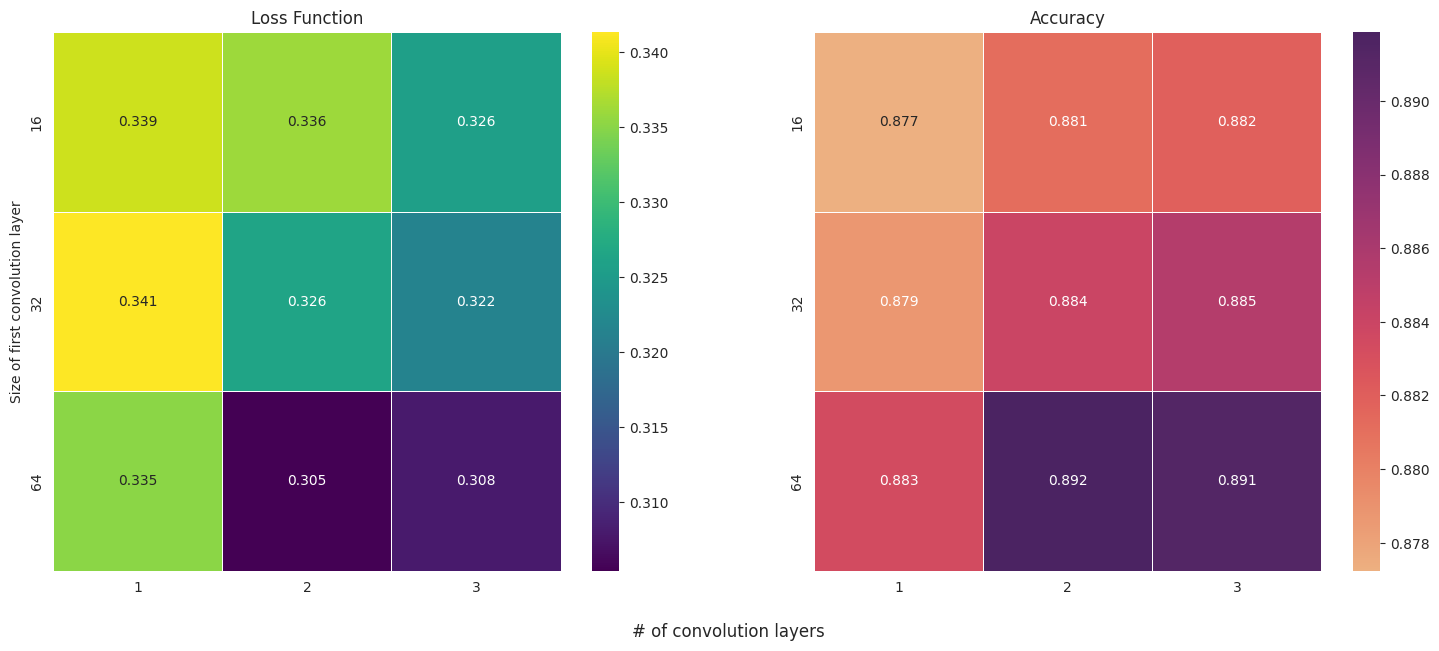

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
losses_cnn = np.array(losses_cnn).reshape(3,3)
sns.heatmap(losses_cnn, linewidth=0.5, cmap = 'viridis', annot=True, fmt='.3g',  xticklabels=param_grid_cnn['convolution_layers'], yticklabels=param_grid_cnn['convolution_channel'], ax = ax1)

accuracies_cnn = np.array(accuracies_cnn).reshape(3,3)
sns.heatmap(accuracies_cnn, linewidth=0.5, cmap='flare',  annot=True, fmt='.3g', xticklabels=param_grid_cnn['convolution_layers'], yticklabels=param_grid_cnn['convolution_channel'], ax=ax2)
fig.supxlabel('# of convolution layers')
ax1.set_ylabel('Size of first convolution layer')

ax1.set_title('Loss Function')
ax2.set_title('Accuracy')

Vidíme, že i tento jednoduchý model dosahuje velmi dobrých výsledků, znatelně lepších než obyčejné dopředné neuronové sítě. 

### Regularizace

Opět jako v předchozím případě se pokusíme o dropout a batch-normalizaci.

In [ ]:
class MyRegulatedCNN(nn.Module):
    def __init__(self, convolution_channel, convolution_layers, dropout_rate, use_batch_norm):
        super().__init__()
        
        self.use_batch_norm = use_batch_norm
        self.dropout = nn.Dropout2d(dropout_rate)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.hidden_batch_norms = nn.ModuleList()
        self.conv_layers = nn.ModuleList()
        prev_channel = 1
        size = 32
        for _ in range(convolution_layers):
            self.conv_layers.append(nn.Conv2d(in_channels = prev_channel, out_channels = convolution_channel, kernel_size = 3))
            self.hidden_batch_norms.append(nn.BatchNorm2d(convolution_channel))
            prev_channel = convolution_channel
            convolution_channel *= 2
            size -= 2
            size //= 2
            
        self.dropout_lin = nn.Dropout1d(0.1)
        self.linear1 = nn.Linear(prev_channel * size * size, 128)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.linear2 = nn.Linear(128, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.output_layer = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1,1,32,32)
        for i, layer in enumerate(self.conv_layers):
            x = layer(x)
            if self.use_batch_norm: 
                x = self.hidden_batch_norms[i](x)
            x = nn.functional.relu(x)
            x = self.pool(x)
            x = self.dropout(x)
            

        x = x.flatten(start_dim = 1) 
        
        x = self.linear1(x)
        x = self.batch_norm1(x)
        x = nn.functional.relu(x)
        x = self.dropout_lin(x)
        
        x = self.linear2(x)
        x = self.batch_norm2(x)
        x = nn.functional.relu(x)
        x = self.dropout_lin(x)
        
        x = self.output_layer(x)
        return x

V rámci výpočetních možností se pokusíme o méně parametrů.

In [ ]:
param_grid_cnn_all = {
        'convolution_channel': [32, 64],
        'convolution_layers': [2, 3],
        'dropout_rate': [0.2, 0.3],
        'use_batch_norm': [False, True]
}


def tune_MyRegulatedCNN(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in ParameterGrid(param_grid):
        model = MyRegulatedCNN(**params)
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())

        vloss, accuracy = train_model(model, device, loss_fn, optimizer, training_loader, validation_loader, False)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_model.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses

In [ ]:
best_model_cnn_regul, accuracies_cnn_regul, losses_cnn_regul = tune_MyRegulatedCNN(train_norm_loader, val_norm_loader, device, param_grid_cnn_all)


Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'use_batch_norm': False}
VALIDATION loss: 0.273, accuraccy: 0.897

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'use_batch_norm': True}
VALIDATION loss: 0.274, accuraccy: 0.899

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.3, 'use_batch_norm': False}
VALIDATION loss: 0.270, accuraccy: 0.897

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.3, 'use_batch_norm': True}
VALIDATION loss: 0.270, accuraccy: 0.899

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 3, 'dropout_rate': 0.2, 'use_batch_norm': False}
VALIDATION loss: 0.264, accuraccy: 0.901

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 3, 'dropout_rate': 0.2, 'use_batch_norm': True}
VALIDATION loss: 0.253, accuraccy: 0.

In [ ]:
print(f'Best model is with params {ParameterGrid(param_grid_cnn_all)[np.argmin(losses_cnn_regul)]}')
print(f'VALIDATION loss: {losses_cnn_regul[np.argmin(losses_cnn_regul)]:.3f}, accuraccy: {accuracies_cnn_regul[np.argmin(losses_cnn_regul)]:.3f}')

Best model is with params {'use_batch_norm': False, 'dropout_rate': 0.3, 'convolution_layers': 3, 'convolution_channel': 64}
VALIDATION loss: 0.248, accuraccy: 0.908


Modely jsme zvládli slušně vylepšit a dosáhli jsme nad 90% validační přesnosti.

Nakonec zkusíme ještě experimentovat s dalším modelem, který bude mít zdvojené jednotlivé konvoluční vrstvy, mezi kterými nebude docházet k maxpoolu.

In [17]:
class MyRegulatedCNN2(nn.Module):
    def __init__(self, convolution_channel, convolution_layers, dropout_rate, use_batch_norm):
        super().__init__()
        
        self.use_batch_norm = use_batch_norm
        self.dropout = nn.Dropout2d(dropout_rate)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.hidden_batch_norms = nn.ModuleList()
        self.conv_layers = nn.ModuleList()
        prev_channel = 1
        size = 32
        for _ in range(convolution_layers):
            self.conv_layers.append(
                    nn.Sequential(
                      nn.Conv2d(in_channels = prev_channel, out_channels = convolution_channel, kernel_size = 3),
                      nn.ReLU(),
                      nn.Conv2d(in_channels = convolution_channel, out_channels = convolution_channel, kernel_size = 3),
                    )
              )
            self.hidden_batch_norms.append(nn.BatchNorm2d(convolution_channel))
            prev_channel = convolution_channel
            convolution_channel *= 2
            size -= 4
            size //= 2
            
        self.dropout_lin = nn.Dropout1d(0.1)
        self.linear1 = nn.Linear(prev_channel * size * size, 128)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.linear2 = nn.Linear(128, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.output_layer = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1,1,32,32)
        for i, layer in enumerate(self.conv_layers):
            x = layer(x)
            if self.use_batch_norm: 
                x = self.hidden_batch_norms[i](x)
            x = nn.functional.relu(x)
            x = self.pool(x)
            x = self.dropout(x)
            

        x = x.flatten(start_dim = 1) 
        
        x = self.linear1(x)
        x = self.batch_norm1(x)
        x = nn.functional.relu(x)
        x = self.dropout_lin(x)
        
        x = self.linear2(x)
        x = self.batch_norm2(x)
        x = nn.functional.relu(x)
        x = self.dropout_lin(x)
        
        x = self.output_layer(x)
        return x

Nyní navíc zkusíme vyladit learning rate u optimizeru Adam, zda by to modelu nemohlo trošku pomoci.

In [18]:
param_grid_cnn_all2 = {
        'convolution_channel': [32, 64],
        'convolution_layers': [2],
        'dropout_rate': [0.2, 0.3],
        'use_batch_norm': [False, True],
        'lr': [0.0001, 0.001]
}


def tune_MyRegulatedCNN2(training_loader,validation_loader, device, param_grid):
    min_loss = None
    best_model = None
    losses = []
    accuracies = []
    for params in ParameterGrid(param_grid):
        model = MyRegulatedCNN2(params['convolution_channel'], params['convolution_layers'], params['dropout_rate'], params['use_batch_norm'] )
        model.to(device)
        print(f'Fitting models with params {params}')
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])

        vloss, accuracy = train_model(model, device, loss_fn, optimizer, training_loader, validation_loader, False)
        losses.append(vloss)
        accuracies.append(accuracy)

        print(f'VALIDATION loss: {vloss:.3f}, accuraccy: {accuracy:.3f}')
        if min_loss is None or vloss < min_loss:
            model.load_state_dict(torch.load("checkpoints/best_model.pt"))
            min_loss = vloss
            best_model = model
        print()
    return best_model, accuracies, losses

In [23]:
best_model_cnn_regul2, accuracies_cnn_regul2, losses_cnn_regul2 = tune_MyRegulatedCNN2(train_norm_loader, val_norm_loader, device, param_grid_cnn_all2)


Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'lr': 0.0001, 'use_batch_norm': False}
VALIDATION loss: 0.259, accuraccy: 0.904

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'lr': 0.0001, 'use_batch_norm': True}
VALIDATION loss: 0.248, accuraccy: 0.910

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'lr': 0.001, 'use_batch_norm': False}
VALIDATION loss: 0.257, accuraccy: 0.904

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.2, 'lr': 0.001, 'use_batch_norm': True}
VALIDATION loss: 0.246, accuraccy: 0.909

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate': 0.3, 'lr': 0.0001, 'use_batch_norm': False}
VALIDATION loss: 0.255, accuraccy: 0.906

Fitting models with params {'convolution_channel': 32, 'convolution_layers': 2, 'dropout_rate'

In [24]:
print(f'Best model is with params {ParameterGrid(param_grid_cnn_all2)[np.argmin(losses_cnn_regul2)]}')
print(f'VALIDATION loss: {losses_cnn_regul2[np.argmin(losses_cnn_regul2)]:.3f}, accuraccy: {accuracies_cnn_regul2[np.argmin(losses_cnn_regul2)]:.3f}')

Best model is with params {'use_batch_norm': True, 'lr': 0.001, 'dropout_rate': 0.3, 'convolution_layers': 2, 'convolution_channel': 64}
VALIDATION loss: 0.234, accuraccy: 0.912


Vidíme, že jsme model nakonec trošku zlepšili na velmi dobrou přesnost 91.2%. Často vidíme, že batch-normalizace bylo užitečné, nicméně neplatí to ve všech případech.

## Vyhodnocení

Podíváme se nakonec na testovací přesnost na testovacích datech, která jsme si pomyslně schovali až na konec.

In [27]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
    best_model_cnn_regul2.eval()
    pred = best_model_cnn_regul2(torch.tensor(Xtest_norm, dtype=torch.float).to(device)).to('cpu')
    p = np.argmax(pred, 1)
    print(f'Test accuracy: {accuracy_score(ytest, p)}')

Test accuracy: 0.9110714285714285


Vidíme, že je velmi podobná validační přesnosti.

A nakonec jen uložíme se `results.csv` naše předikce.

In [40]:
eval = pd.read_csv('evaluate.csv')
ID = pd.DataFrame(eval['ID'])
eval.drop(columns='ID', inplace=True)
eval = eval.to_numpy()
eval = eval/255
prediction = None
with torch.no_grad():
    best_model_cnn_regul2.eval()
    pred = best_model_cnn_regul2(torch.tensor(eval, dtype=torch.float).to(device)).to('cpu')
    prediction = np.argmax(pred, 1)
prediction = pd.DataFrame(prediction, columns=['label'])
results = pd.concat([ID, prediction], axis = 1)
results.to_csv('results.csv', index = False)
